# Load data

In [1]:
import pandas as pd

In [2]:
#activities
residual_800 = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/data/residuals_800_q.csv')

In [3]:
#questions
x_train_800 = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/data/X_train_800.csv')

In [4]:
residual_800.head()

,activity,q_num,rank,score,userid
0,answer,0,1,1.234562,571407
1,comment,0,3952,0.120353,1381767
2,comment,0,1,1.234562,571407
3,comment,0,2840,0.206159,1292401
4,comment,0,2821,0.208532,1025201


# Find outliers

In [5]:
import numpy as np

In [6]:
def outliers(li):
    qua1, qua3 = np.percentile(li, [25, 75])
    iqr = qua3 - qua1
    upper_bound = qua3 + (iqr * 1.5)
    li_outlier = [i for i in li if i >= upper_bound]
    return li_outlier

In [7]:
outlier_rank = outliers(list(residual_800['rank']))

In [8]:
#dataframe with outliers
activities_outliers = residual_800[residual_800['rank'].isin(outlier_rank)]

# Questions of these observed outlier ranks

In [9]:
outlier_question = x_train_800[x_train_800.index.isin(activities_outliers.q_num.unique())]

In [10]:
outlier_question.head()

,Unnamed: 0,Unnamed: 0.1,Id,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
2,2,67737,11209935,NaN,NaN,2012-06-26T14:46:59.163,2,10504.0,<p>I 'm getting the date in the following form...,964819.0,NaN,904049.0,Changing one date format to another,java date format,4.0,1,NaN,NaN
13,13,1296,8741054,NaN,8741143.0,2012-01-05T10:37:18.253,0,1732.0,<p>How to resolve warning message coming in ec...,374199.0,NaN,1977903.0,Eclipse Warning message,java eclipse,5.0,6,0.0,NaN
14,14,43834,10314404,NaN,10314451.0,2012-04-25T11:09:04.190,-2,2842.0,<p>I am working on Galaxy Nexus(Android 4.0.3)...,896579.0,NaN,136445.0,How to save captured image to gallery,java android emulation samsung-mobile,2.0,1,NaN,NaN
23,23,68460,11239086,NaN,11239128.0,2012-06-28T06:23:16.197,132,291504.0,<blockquote>\r\r\r\n <p><strong>Possible Dupl...,1439243.0,NaN,-1.0,java.lang.UnsupportedClassVersionError Unsuppo...,java,7.0,0,33.0,2013-02-04T07:29:18.850
24,24,20678,9484820,NaN,NaN,2012-02-28T15:33:14.167,-1,1488.0,<p>I have an html file called basic.html and w...,1178770.0,NaN,1400768.0,Regex - find various strings from an HTML file,java html regex,2.0,4,NaN,2014-09-27T14:44:12.220


In [12]:
y_train = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/data/y_train.csv')

# map activity for feature matrix (question number)

In [16]:
def map_activity(file_name):
    """ Modify Feature Matrix (Ranks of users for each question) to add activities.
    
    Argument: file_name (int) - the question number
    
    Return: pd.dataframe - the modified feature matrix
    """
    
    path = '/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/feature_matrices/'\
    + 'q_' + str(file_name) + '_feature_matrix.csv'
    
    que = pd.read_csv(path, header = None)
    user_activity = residual_800[residual_800.q_num == file_name]
    user_activity_dict = {i:j for i, j in zip(user_activity.userid, user_activity.activity)}

    activity_que = []
    for i in que[0]:
        if i in user_activity_dict.keys():
            activity_que.append(user_activity_dict.get(i))
        else:
            activity_que.append('no_act')
    que['activity'] = activity_que
    
    que.sort_values(4)
    que['rank'] = que.index
    return que

In [17]:
num = 101
def get_feature_rank(num):
    """ Use function: map_activity to run
    
    Argument: num (int) - question number (feature matrid file)
    
    Return: pd.DataFrame - the dataframe with sorted feature rank
    """
    
    que_no_white = map_activity(num)[map_activity(num).activity != 'no_act']

    q_num = []
    user = []
    feature_score = []
    feature_rank = []
    activity = []
    rank = []

    for i in que_no_white.index:
        users = que_no_white.loc[i][1:4]
        users_dic = {i:j for i, j in zip(users.index, users.values)}
        sorted_dic = sorted(users_dic, key=users_dic.get)
    
        q_num.append(num)
        user.append(que_no_white.loc[i,0])
        feature_score.append(list(que_no_white.loc[i][1:4]))
        feature_rank.append(sorted_dic)
        activity.append(que_no_white.loc[i]['activity'])
        rank.append(que_no_white.loc[i, 'rank'])

    out_dict = {'q_num':q_num, 'user':user, 'feature_score':feature_score,'feature_rank':feature_rank, 'activity':activity, 'rank':rank}
    out_df = pd.DataFrame(out_dict)
    out_df = out_df[['q_num','user','rank', 'feature_score','feature_rank','activity']]
    
    return out_df

In [18]:
#example
get_feature_rank(101)

,q_num,user,rank,feature_score,feature_rank,activity
0,101,571407.0,2,"[0.0, 0.576923076923077, 0.4708183461080127]","[1, 3, 2]",comment
1,101,537445.0,309,"[1.0, 0.0002530364372469636, 0.0]","[3, 2, 1]",favorite
2,101,177800.0,1792,"[0.02247191011235955, 0.04352226720647773, 0.0...","[1, 3, 2]",edit
3,101,422437.0,4452,"[0.0, 0.0027834008097165994, 0.002322455232130...","[1, 3, 2]",favorite


# Feature Score Rank and Frequency 

In [19]:
import time

start = time.time()
que_df = [get_feature_rank(i) for i in range(0,800)]
end = time.time()
print('Run Time:', end-start)

Run Time: 363.7047698497772


In [20]:
feature_rank = pd.concat(que_df)

In [21]:
# result_t = result[result['rank'] > 0.17 * len(map_activity(0))]
# result_before_t = result[result['rank'] < 0.17 * len(map_activity(0))]

In [22]:
# f_rank = result_t.feature_rank.astype(str)
# f_rank_before_t = result_before_t.feature_rank.astype(str)

# Scatter Plot

In [23]:
feature_rank.head()

,q_num,user,rank,feature_score,feature_rank,activity
0,0.0,571407.0,1.0,"[0.057844690966719486, 0.6740331491712708, 0.5...","[1, 3, 2]",comment
1,0.0,1025201.0,2821.0,"[0.05882352941176471, 0.08588648920140633, 0.0...","[1, 3, 2]",edit
2,0.0,1292401.0,2840.0,"[0.2, 0.0045203415369161224, 0.001638857626554...","[3, 2, 1]",edit
3,0.0,1381767.0,3952.0,"[0.10344827586206896, 0.01054746358613762, 0.0...","[3, 2, 1]",comment
0,1.0,157882.0,1111.0,"[0.0, 0.3107287449392713, 0.2623384845712786]","[1, 3, 2]",edit


In [24]:
# split the data based on the t*
under_thres = feature_rank[feature_rank['rank'] < 0.17*max(feature_rank['rank'])]
over_thres = feature_rank[feature_rank['rank'] >= 0.17*max(feature_rank['rank'])]

In [25]:
under_thres.groupby('activity').size()

activity
answer      1093
comment      854
edit         562
favorite     146
dtype: int64

In [26]:
over_thres.groupby('activity').size()

activity
answer      206
comment      26
edit         40
favorite     94
dtype: int64

In [27]:
activities_outliers.activity.value_counts()

answer      219
favorite     97
edit         43
comment      30
Name: activity, dtype: int64

In [28]:
import re
import matplotlib.pyplot as plt

In [29]:
def stacked_thres(data,activity):
    """give frequency of rank for each feature
    
    Argument: input data (pd DataFrame) -  the input data
    
    Return: pd.DataFrame - table with frequency 
    """
    f_ranks = data[data['activity'] == activity]['feature_rank']
    fmin = []
    fmed = []
    fmax = []

    for i in range(len(f_ranks)):
        ranks = list(map(str, f_ranks.iloc[i]))
        fmin.append(ranks[0])
        fmed.append(ranks[1])
        fmax.append(ranks[2])
    d1 = pd.DataFrame([{x:fmin.count(x) for x in fmin}])
    d2 = pd.DataFrame([{x:fmed.count(x) for x in fmed}])
    d3 = pd.DataFrame([{x:fmax.count(x) for x in fmax}])
    df = pd.concat([d1,d2,d3]).fillna(0).set_index([['min','med','max']])
    return df

In [69]:
# scatter plot 
def stacked_bar(data, suptitle):
    """ input data in a pd dataframe to plot graph, suuptitle (str) - graph suptitle
    """
    plt.figure()
    for i in range(len(feature_rank.activity.unique())):
        activity = feature_rank.activity.unique()[i]
        df = stacked_thres(data,activity)
        ax = plt.subplot(2,2,i+1)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        for i in range(3):
            values = df.iloc[i]
            ax.scatter(df.index, values)
        plt.title(activity)
    ax.legend(df.columns,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.suptitle(suptitle)
    plt.show()

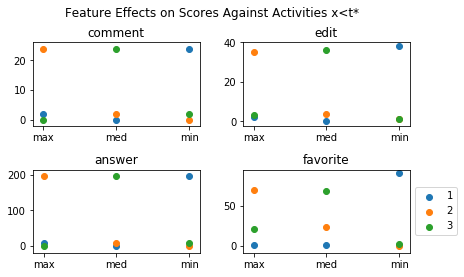

In [70]:
stacked_bar(over_thres, "Feature Effects on Scores Against Activities x<t*")

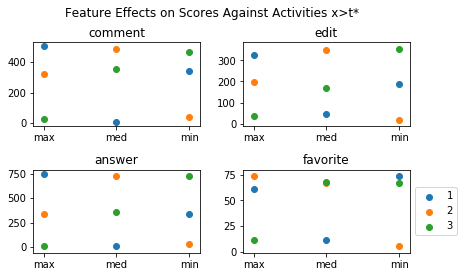

In [71]:
stacked_bar(under_thres, "Feature Effects on Scores Against Activities x>t*")

# Mean score for feature 1

In [118]:
#feature 1 after t
f1_t = [i[0] for i in over_thres.feature_score]
np.mean(f1_t)

0.031372394487763029

In [119]:
counter = 0
for i in f1_t:
    if i == 0.0:
        counter += 1
        
print('There are', counter, 'zeros out of', len(f1_t), '.')

There are 348 zeros out of 366 .


In [120]:
#feature 1 after t
f1_before_t = [i[0] for i in under_thres.feature_score]
np.mean(f1_before_t)

0.15883309969441023

In [121]:
counter = 0
for i in f1_before_t:
    if i == 0.0:
        counter += 1
        
print('There are', counter, 'zeros out of', len(f1_before_t), '.')

There are 447 zeros out of 2655 .


# Users who got 0 score in feature 1

In [27]:
user_id_0_index_t = []
for i in range(len(f1_t)):
    if f1_t[i] == 0:
        user_id_0_index_t.append(i)

In [28]:
user_id_0_t = [list(result_t.user)[i] for i in user_id_0_index_t]

In [30]:
# import simplejson
# f = open('output.txt', 'w')
# simplejson.dump(user_id_0_t, f)
# f.close()

# Frequency 

In [122]:
result_t.activity.value_counts()
#make sense becsuse favourite doesn't really do anything to the system

answer      206
favorite     94
edit         40
comment      26
Name: activity, dtype: int64

In [123]:
f_rank.value_counts()

[1, 3, 2]    324
[1, 2, 3]     25
[3, 2, 1]     15
[2, 3, 1]      1
[3, 1, 2]      1
Name: feature_rank, dtype: int64

In [124]:
f_rank_before_t.value_counts()

[3, 2, 1]    1550
[1, 3, 2]     862
[3, 1, 2]      92
[1, 2, 3]      82
[2, 3, 1]      68
[2, 1, 3]       1
Name: feature_rank, dtype: int64

In [133]:
import pickle

In [ ]:
users_availability = []
with (open("/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/train_test/engineered_features/user_availibility_network.p", "rb")) as openfile:
    while True:
        try:
            users_availability.append(pickle.load(openfile))
        except EOFError:
            break